In [ ]:
import roomor
from roomor.generator import CubeRoomGenerator
import rospy
import os

In [2]:
master = rospy.get_master()
target = master.target
target._ServerProxy__host.split(":")

['localhost', '11311']

In [3]:
master = os.getenv('ROS_MASTER_URI')
print(master)
host, port = master.split("//")[1].split(":")
host, int(port)

http://localhost:11311


('localhost', 11311)

In [4]:
gazebo_proxy = {
            'ros_host': 'localhost', 
            'ros_port': 11311, 
            'gazebo_host': 'localhost',
            'gazebo_port': 11345
}

room_generator_params = dict()
room_generator_params['obstacle_count'] = 10
room_generator_params['obstacle_size'] = 0.4
room_generator_params['target_size'] = 0.2
room_generator_params['room_length_max'] = 12
room_generator_params['room_mass_min'] = 100
room_generator_params['room_mass_max'] = 150
room_generator_params['room_wall_height'] = 0.8
room_generator_params['room_wall_thickness'] = 0.05
room_generator_params['agent_size'] = 0.4
room_generator_params['wall_threshold'] = 0.01

room_generator_params.update(gazebo_proxy)

c = CubeRoomGenerator(**room_generator_params)
g = c.generate_new()
g.spawn_all()

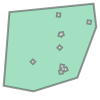

In [5]:
p = g.get_freespace_poly()
p

In [8]:
obs = g.obstacle_pose['positions']
obs

array([[ 4.89900088,  3.17521051,  0.2       ],
       [ 1.62078853, -2.67610106,  0.2       ],
       [ 1.95425905, -2.73067168,  0.2       ],
       [-2.13531736, -1.7870176 ,  0.2       ],
       [ 1.37489471, -3.07408961,  0.2       ],
       [ 1.31457326,  1.59044494,  0.2       ],
       [ 1.46915152,  1.69314445,  0.2       ],
       [ 1.50334122, -2.35760212,  0.2       ],
       [ 1.07333385,  4.07280897,  0.2       ],
       [ 1.21538115, -0.01371029,  0.2       ]])

In [11]:
tgs = g.target_pose['positions']
tgs

array([[ 4.72166684,  3.32056398,  0.1       ],
       [ 1.23099686, -2.56625466,  0.1       ],
       [-2.21047737, -1.99166079,  0.1       ],
       [ 1.45967402,  1.90409028,  0.1       ],
       [ 0.85615398,  3.94623348,  0.1       ],
       [ 1.27971475, -0.23836022,  0.1       ]])

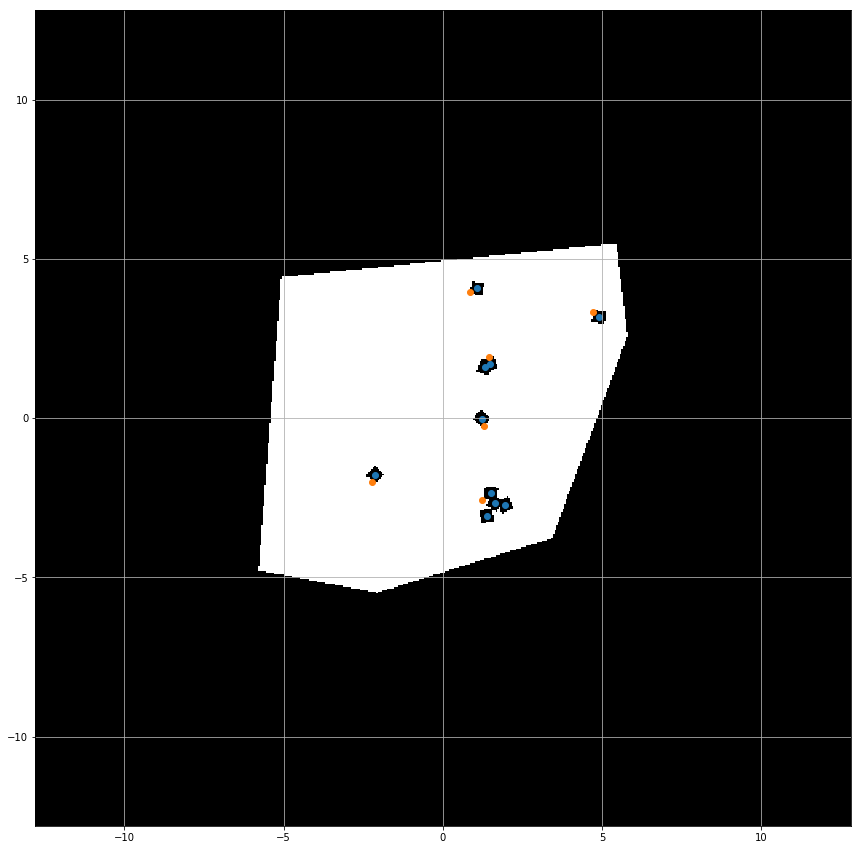

In [12]:
import numpy as np
import matplotlib.pyplot as plt

mapl = 512 * 0.05 / 2
data = g.get_occupancy_grid(p)
plt.figure(figsize=(15,15))
plt.grid(True)
plt.imshow(data.reshape(np.full([2], np.sqrt(len(data)), dtype=np.int32))[::-1,:], cmap='gray', extent=[-mapl, mapl, -mapl, mapl])
plt.scatter(obs[:,0], obs[:,1])
plt.scatter(tgs[:,0], tgs[:,1])